### Classifying newswires

In this example we'll build a network to classify **Reuters newswires** into **46** mutually
exclusive topics. Because you have many classes, this problem is an instance of **multiclass
classification**; and because each data point should be classified into only one category,
the problem is more specifically an instance of **single-label, multiclass classification**.

If each data point could belong to multiple categories, you’d be
facing a **multilabel, multiclass classification problem**.


### More about the Dataset
* **Reuters dataset** is a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are *46 different topics*.
* **Reuters dataset** comes packaged as part of *Keras*.

### Let's start classifing:
### At first, we load the data set from Keras
 * The argument **num_words=10000** in the code snippet restricts the data to the 10,000 most frequently occurring words found in the data.

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

print('Number of training examples:', len(train_data))
print('Number of test examples:', len(test_data))

Using TensorFlow backend.


Number of training examples: 8982
Number of test examples: 2246


* So the variables **train_data** and **test_data** are list of newswires each example is a list of words encoded as integers which is called **word indices**.

In [2]:
print('Example #7 from the training examples:')
print(train_data[6])

Example #7 from the training examples:
[1, 56, 5539, 925, 149, 8, 16, 23, 931, 3875, 25, 116, 5, 165, 15, 10, 67, 13, 12, 12, 11, 5311, 400, 81, 79, 457, 145, 22, 331, 28, 3026, 331, 61, 3609, 2097, 5311, 79, 64, 85, 1863, 84, 22, 44, 6206, 2275, 79, 296, 1384, 157, 5539, 8, 16, 23, 3875, 4, 116, 6, 837, 5311, 6, 3834, 31, 248, 1032, 8757, 4, 1618, 5, 37, 38, 1639, 27, 358, 37, 38, 4716, 9, 6, 9474, 4, 316, 9, 662, 5, 4, 765, 5, 291, 58, 60, 2660, 1067, 136, 4, 384, 292, 270, 120, 17, 12]


* Of course we can quickly decode these newswires back to English words, by using the function **get_word_index** using the following code snippet:

In [4]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved
# indices for "padding," "start of sequence," and "unknown."
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[6]])

print('The original text for example #7:', decoded_newswire)

The original text for example #7: ? lt qintex america ltd said it is again extending its offer of 13 dlrs a share for 3 3 mln princeville development corp shares until today from yesterday at midnight yesterday 7 242 117 princeville shares had been tendered up from 5 887 165 shares 24 hours earlier qintex said it is extending the offer to allow princeville to comply with federal law restricting the ownership of u s airlines by non u s citizens and to finalize the terms and conditions of the letter of credit or bank guarantee required under the previously announced acquisition agreement reuter 3


### Second,  we prepair the data to be fed to the network

- We can't feed lists of integers into a neural network. You have to turn your lists into tensors.
- There are two ways to do that:
> - Vectorization
> - One-hot encoding

#### Let's start with vectorization:

In [5]:
# vectorize the data
import numpy as np

# This function take a sequence of data and vectorized 
# by putting a 1s for specific indecies
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indecies of results[i] to 1s
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print('Training example #7 before vectorization:', train_data[6])
print()
print('Training example #7 after vectorization:', x_train[6])

Training example #7 before vectorization: [1, 56, 5539, 925, 149, 8, 16, 23, 931, 3875, 25, 116, 5, 165, 15, 10, 67, 13, 12, 12, 11, 5311, 400, 81, 79, 457, 145, 22, 331, 28, 3026, 331, 61, 3609, 2097, 5311, 79, 64, 85, 1863, 84, 22, 44, 6206, 2275, 79, 296, 1384, 157, 5539, 8, 16, 23, 3875, 4, 116, 6, 837, 5311, 6, 3834, 31, 248, 1032, 8757, 4, 1618, 5, 37, 38, 1639, 27, 358, 37, 38, 4716, 9, 6, 9474, 4, 316, 9, 662, 5, 4, 765, 5, 291, 58, 60, 2660, 1067, 136, 4, 384, 292, 270, 120, 17, 12]

Training example #7 after vectorization: [0. 1. 0. ... 0. 0. 0.]


#### To vectorize the labels, we can use one-hot encoding:
- **One-hot encoding** is a widely used format for categorical data, also called **categorical encoding**. 
> **One-hot encoding** of
the labels consists of embedding each label as an **all-zero** vector with a **1** in the place of
the label index.

In [6]:
# Use one-hot encoding for the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [8]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print('Label of the training example #7 befor one-hot encoding:', train_labels[6])
print()
print('Label of the training example #7 after one-hot encoding:', one_hot_train_labels[6])

Label of the training example #7 befor one-hot encoding: 4

Label of the training example #7 after one-hot encoding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- Note that there is a built-in way to do this in Keras, which you’ve already seen in action **to_categorical**

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Now, we building our network
#### In this topic-classification problem there is a new constraint here: 
- The number of output classes has gone from **2 to 46**. The dimensionality of the output space is much larger.


#### There are two things we should consider when designing our architecture:
> - The network need to end with a **Dense layer of size 46**. This means for each input
sample, the network will output a 46-dimensional vector. 

> - The last layer uses a **softmax activation** which means the network will output a probability distribution over the 46
different output classes for every input sample, the network will produce a 46-dimensional output vector.

> - The best loss function to use in this case is **categorical_crossentropy** where it measures
the distance between two probability distributions.

In [10]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Let's set apart 1,000 samples in the training data to use as a validation set

In [12]:
# validating set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 344us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7204 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 237us/step - loss: 1.4450 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 244us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 2s 247us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 238us/step - loss: 0.7032 - acc: 0.8480 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 269us/step - loss: 0.5665 - acc: 0.8795 - val_loss: 0.9409 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 255us/step - loss: 0.4580 - a

In [14]:
print('The model accuracy is:', max(history.history['acc']))
print()

The model accuracy is: 0.9595339507932383



### Let's plot the train and validation loss

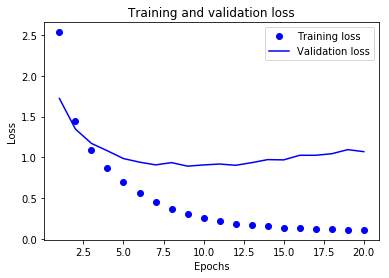

In [16]:
# Ploting the train and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Let's plot train and validation accuracy

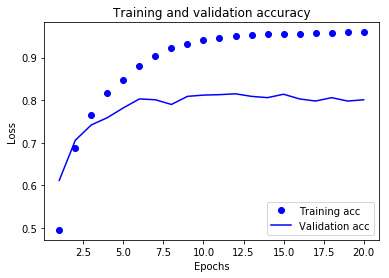

In [17]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Try other networks and configurations

In [15]:
# New network
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=9, 
                    batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 270us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 254us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 233us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 231us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 255us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 2s 239us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 229us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [16]:
print(results)

[1.0222080231562112, 0.7756010686194165]


In [18]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array)) / len(test_labels))

0.19857524487978628


In [19]:
# Generate predictions for new data
predictions = model.predict(x_test)

In [21]:
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

0.9999998
3


In [22]:
# Another encoding method
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# validating set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=9, 
                    batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 282us/step - loss: 0.2598 - acc: 0.9400 - val_loss: 0.9024 - val_acc: 0.8190
Epoch 2/9
7982/7982 [==============================] - 2s 253us/step - loss: 0.1959 - acc: 0.9501 - val_loss: 0.9073 - val_acc: 0.8180
Epoch 3/9
7982/7982 [==============================] - 2s 236us/step - loss: 0.1760 - acc: 0.9533 - val_loss: 1.0000 - val_acc: 0.7990
Epoch 4/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.1561 - acc: 0.9548 - val_loss: 0.9256 - val_acc: 0.8220
Epoch 5/9
7982/7982 [==============================] - 2s 257us/step - loss: 0.1408 - acc: 0.9549 - val_loss: 0.9887 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 2s 231us/step - loss: 0.1312 - acc: 0.9558 - val_loss: 0.9831 - val_acc: 0.8180
Epoch 7/9
7982/7982 [==============================] - 2s 234us/step - loss: 0.1283 - acc: 0.9588 - val_loss: 1.0701 - val_acc: 0.7950
Epoch 8

In [23]:
print(results)

[1.230331992211346, 0.772039180792344]


In [30]:
# New network 128 - 64 - 46
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=9, 
                    batch_size=512, validation_data=(x_val, y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 396us/step - loss: 2.2728 - acc: 0.5730 - val_loss: 1.4644 - val_acc: 0.6630
Epoch 2/9
7982/7982 [==============================] - 2s 285us/step - loss: 1.1693 - acc: 0.7468 - val_loss: 1.1394 - val_acc: 0.7610
Epoch 3/9
7982/7982 [==============================] - 2s 306us/step - loss: 0.8247 - acc: 0.8250 - val_loss: 1.0025 - val_acc: 0.7820
Epoch 4/9
7982/7982 [==============================] - 2s 299us/step - loss: 0.6056 - acc: 0.8777 - val_loss: 0.9558 - val_acc: 0.8050
Epoch 5/9
7982/7982 [==============================] - 2s 311us/step - loss: 0.4524 - acc: 0.9093 - val_loss: 0.9119 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 2s 299us/step - loss: 0.3442 - acc: 0.9300 - val_loss: 0.8730 - val_acc: 0.8210
Epoch 7/9
7982/7982 [==============================] - 2s 284us/step - loss: 0.2765 - acc: 0.9416 - val_loss: 0.8890 - val_acc: 0.8210
Epoch 8

In [31]:
# New network 128 - 64 - 46
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=13, 
                    batch_size=512, validation_data=(x_val, y_val))

print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/13
7982/7982 [==============================] - 3s 356us/step - loss: 2.4528 - acc: 0.5541 - val_loss: 1.5016 - val_acc: 0.6750
Epoch 2/13
7982/7982 [==============================] - 2s 295us/step - loss: 1.2388 - acc: 0.7315 - val_loss: 1.2118 - val_acc: 0.7300
Epoch 3/13
7982/7982 [==============================] - 2s 298us/step - loss: 0.9144 - acc: 0.7990 - val_loss: 1.0714 - val_acc: 0.7780
Epoch 4/13
7982/7982 [==============================] - 2s 283us/step - loss: 0.6921 - acc: 0.8472 - val_loss: 1.0188 - val_acc: 0.7830
Epoch 5/13
7982/7982 [==============================] - 3s 314us/step - loss: 0.5277 - acc: 0.8847 - val_loss: 0.9622 - val_acc: 0.7970
Epoch 6/13
7982/7982 [==============================] - 2s 287us/step - loss: 0.3958 - acc: 0.9189 - val_loss: 0.9268 - val_acc: 0.8140
Epoch 7/13
7982/7982 [==============================] - 2s 298us/step - loss: 0.3161 - acc: 0.9325 - val_loss: 0.9335 - val_acc: 0.8040
